# Input Libs

In [84]:
pip install factor_analyzer

     |████████████████████████████████| 41 kB 453 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=5334449dc0f551e9d05f99a8ebb24febcbda050c50cf179a1ac8650db4767613
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import numpy as np
from scipy.stats import chisquare, kstest, norm
from factor_analyzer import FactorAnalyzer, Rotator
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import calinski_harabasz_score

# Pre-task execution

In [4]:
filename = "data.xls"

df = pd.read_excel(filename, index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 1 to 183
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CountryName                 184 non-null    object 
 1   HighIncome                  184 non-null    int64  
 2   Income                      184 non-null    object 
 3   Development                 184 non-null    object 
 4   Region                      184 non-null    object 
 5   WorldRank                   177 non-null    float64
 6   RegionRank                  177 non-null    float64
 7   2022Score                   177 non-null    float64
 8   PropertyRights              177 non-null    float64
 9   JudicialEffectiveness       177 non-null    float64
 10  GovernmentIntegrity         177 non-null    float64
 11  TaxBurden                   177 non-null    float64
 12  GovernmentSpending          177 non-null    float64
 13  FiscalHealth                177 non

### Data clearing

In [5]:
highIncome = "HighIncome"
# For High Income should be 0
df[highIncome] = pd.to_numeric(df[highIncome], errors = 'coerce').fillna(0).astype(int)

In [6]:
wRank = "WorldRank"
# For WorldRank null data should be filled as median 
df[wRank] = pd.to_numeric(df[wRank], errors='coerce')
df[wRank] = df[wRank].fillna(df[wRank].median())

In [7]:
rRank = "RegionRank"
# For RegionRank null data should be filled as median 
df[rRank] = pd.to_numeric(df[rRank], errors='coerce')
df[rRank] = df[rRank].fillna(df[rRank].median())

In [8]:
score = "2022Score"
# For 2022Score null data should be filled as median 
df[score] = pd.to_numeric(df[score], errors='coerce')
df[score] = df[score].fillna(df[score].median())

In [9]:
eff = "JudicialEffectiveness"
# For JudicialEffectiveness null data should be filled as median 
df[eff] = pd.to_numeric(df[eff], errors='coerce')
df[eff] = df[eff].fillna(df[eff].median())

In [10]:
govInt = "GovernmentIntegrity"
# For GovernmentIntegrity null data should be filled as 0
df[govInt] = pd.to_numeric(df[govInt], errors='coerce')
df[govInt] = df[govInt].fillna(0)

In [11]:
tax = "TaxBurden"
# For TaxBurden null data should be filled as median
df[tax] = pd.to_numeric(df[tax], errors='coerce')
df[tax] = df[tax].fillna(df[tax].median())

In [12]:
govSpending = "GovernmentSpending"
# For GovernmentSpending null data should be filled as median
df[govSpending] = pd.to_numeric(df[govSpending], errors='coerce')
df[govSpending] = df[govSpending].fillna(df[govSpending].median())

In [13]:
fisHealth = "FiscalHealth"
# For FiscalHealth null data should be filled as median
df[fisHealth] = pd.to_numeric(df[fisHealth], errors='coerce')
df[fisHealth] = df[fisHealth].fillna(df[fisHealth].median())

In [14]:
busFreedom = "BusinessFreedom"
# For BusinessFreedom null data should be filled as median
df[busFreedom] = pd.to_numeric(df[busFreedom], errors='coerce')
df[busFreedom] = df[busFreedom].fillna(df[busFreedom].median())

In [15]:
labFreedom = "LaborFreedom"
# For LaborFreedom null data should be filled as median
df[labFreedom] = pd.to_numeric(df[labFreedom], errors='coerce')
df[labFreedom] = df[labFreedom].fillna(df[labFreedom].median())

In [16]:
monFreedom = "MonetaryFreedom"
# For MonetaryFreedom null data should be filled as median
df[monFreedom] = pd.to_numeric(df[monFreedom], errors='coerce')
df[monFreedom] = df[monFreedom].fillna(df[monFreedom].median())

In [17]:
trdFreedom = "TradeFreedom"
# For TradeFreedom null data should be filled as median
df[trdFreedom] = pd.to_numeric(df[trdFreedom], errors='coerce')
df[trdFreedom] = df[trdFreedom].fillna(df[trdFreedom].median())

In [18]:
invFreedom = "InvestmentFreedom"
# For InvestmentFreedom null data should be filled as median
df[invFreedom] = pd.to_numeric(df[invFreedom], errors='coerce')
df[invFreedom] = df[invFreedom].fillna(df[invFreedom].median())

In [19]:
finFreedom = "FinancialFreedom"
# For FinancialFreedom null data should be filled as median
df[finFreedom] = pd.to_numeric(df[finFreedom], errors='coerce')
df[finFreedom] = df[finFreedom].fillna(df[finFreedom].median())

In [20]:
trafRate = "TariffRate"
# For TariffRate null data should be filled as median
df[trafRate] = pd.to_numeric(df[trafRate], errors='coerce')
df[trafRate] = df[trafRate].fillna(df[trafRate].median())

In [21]:
incomeTax = "IncomeTaxRate"
# For IncomeTaxRate null data should be filled as median
df[incomeTax] = pd.to_numeric(df[incomeTax], errors='coerce')
df[incomeTax] = df[incomeTax].fillna(df[incomeTax].median())

In [22]:
corpTax = "CorporateTaxRate"
# For CorporateTaxRate null data should be filled as median
df[corpTax] = pd.to_numeric(df[corpTax], errors='coerce')
df[corpTax] = df[corpTax].fillna(df[corpTax].median())

In [23]:
gdrTax = "TaxBurdenofGDP"
# For TaxBurdenofGDP null data should be filled as median
df[gdrTax] = pd.to_numeric(df[gdrTax], errors='coerce')
df[gdrTax] = df[gdrTax].fillna(df[gdrTax].median())

In [24]:
govGDR = "GovernmentExpenditurofGDP "
# For GovernmentExpenditurofGDP null data should be filled as median
df[govGDR] = pd.to_numeric(df[govGDR], errors='coerce')
df[govGDR] = df[govGDR].fillna(df[govGDR].median())

In [25]:
population = "Population"
# For Population null data should be filled as median
df[population] = pd.to_numeric(df[population], errors='coerce')
df[population] = df[population].fillna(df[population].median())

In [26]:
gdp = "GDP"
# For GDP null data should be filled as median
df[gdp] = pd.to_numeric(df[gdp], errors='coerce')
df[gdp] = df[gdp].fillna(df[gdp].median())

In [27]:
growthRate = "GDP_GrowthRate"
# For GDP_GrowthRate null data should be filled as median
df[growthRate] = pd.to_numeric(df[growthRate], errors='coerce')
df[growthRate] = df[growthRate].fillna(df[growthRate].median())

In [28]:
year5GrowthRate = "5Year_GDP_GrowthRate"
# For 5Year_GDP_GrowthRate null data should be filled as median
df[year5GrowthRate] = pd.to_numeric(df[year5GrowthRate], errors='coerce')
df[year5GrowthRate] = df[year5GrowthRate].fillna(df[year5GrowthRate].median())

In [29]:
gdpPerCap = "GDPperCapita"
# For GDPperCapita null data should be filled as median
df[gdpPerCap] = pd.to_numeric(df[gdpPerCap], errors='coerce')
df[gdpPerCap] = df[gdpPerCap].fillna(df[gdpPerCap].median())

In [30]:
unemp = "Unemployment"
# For Unemployment null data should be filled as median
df[unemp] = pd.to_numeric(df[unemp], errors='coerce')
df[unemp] = df[unemp].fillna(df[unemp].median())

In [31]:
infl = "Inflation"
# For Inflation null data should be filled as median
df[infl] = pd.to_numeric(df[infl], errors='coerce')
df[infl] = df[infl].fillna(df[infl].median())

In [32]:
inflow = "FDIInflow"
# For FDIInflow null data should be filled as median
df[inflow] = pd.to_numeric(df[inflow], errors='coerce')
df[inflow] = df[inflow].fillna(df[inflow].median())

In [33]:
debt = "PublicDebt"
# For PublicDebt null data should be filled as median
df[debt] = pd.to_numeric(df[debt], errors='coerce')
df[debt] = df[debt].fillna(df[debt].median())

In [34]:
prpRights = "PropertyRights"
# For PropertyRights null data should be filled as median 
df[prpRights] = pd.to_numeric(df[prpRights], errors='coerce')
df[prpRights] = df[prpRights].fillna(df[prpRights].median())

In [35]:
income = "Income"
# For Income should create dummy
df.loc[df.groupby(income)[income].transform('count').lt(4), income] = 'other'
df_with_dummies = pd.get_dummies(df, columns=[income])

In [36]:
dev = "Development"
# For Development should create dummy
df.loc[df.groupby(dev)[dev].transform('count').lt(4), dev] = 'other'
df_with_dummies = pd.get_dummies(df_with_dummies, columns=[dev])

In [44]:
region = "Region"
# For Region should create dummy
df.loc[df.groupby(region)[region].transform('count').lt(4), region] = 'other'
df_with_dummies = pd.get_dummies(df_with_dummies, columns=[region])

In [45]:
df_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 1 to 183
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CountryName                          184 non-null    object 
 1   HighIncome                           184 non-null    int64  
 2   WorldRank                            184 non-null    float64
 3   RegionRank                           184 non-null    float64
 4   2022Score                            184 non-null    float64
 5   PropertyRights                       184 non-null    float64
 6   JudicialEffectiveness                184 non-null    float64
 7   GovernmentIntegrity                  184 non-null    float64
 8   TaxBurden                            184 non-null    float64
 9   GovernmentSpending                   184 non-null    float64
 10  FiscalHealth                         184 non-null    float64
 11  BusinessFreedom                 

# Task 1

In [47]:
df_with_dummies.corr().sort_values(by=['TariffRate'])['TariffRate']

TradeFreedom                          -0.836958
BusinessFreedom                       -0.497330
2022Score                             -0.482924
PropertyRights                        -0.453347
MonetaryFreedom                       -0.448836
GDPperCapita                          -0.432999
FinancialFreedom                      -0.427789
HighIncome                            -0.398941
Income_high income                    -0.398941
Region_Europe                         -0.379159
Development_developed                 -0.366983
JudicialEffectiveness                 -0.365185
InvestmentFreedom                     -0.350062
GovernmentIntegrity                   -0.348495
GovernmentExpenditurofGDP             -0.347149
LaborFreedom                          -0.343095
TaxBurdenofGDP                        -0.271935
GDP                                   -0.141760
FDIInflow                             -0.127762
Region_Asia-Pacific                   -0.087417
5Year_GDP_GrowthRate                  -0

In [70]:
dependent_var = "TariffRate"
predictors = [
    "Income_middle income", # 0.237132
    "Region_Sub-Saharan Africa",
    "Development_developing", # 0.366983

    "WorldRank", # 0.486610
    "RegionRank", # 0.276679
    "CorporateTaxRate", # 0.255994
    "GovernmentSpending", # 0.346049
    "Inflation" # 0.223648
    # Should add 5 more with the highest corr
]

## Variable analysis

### Income

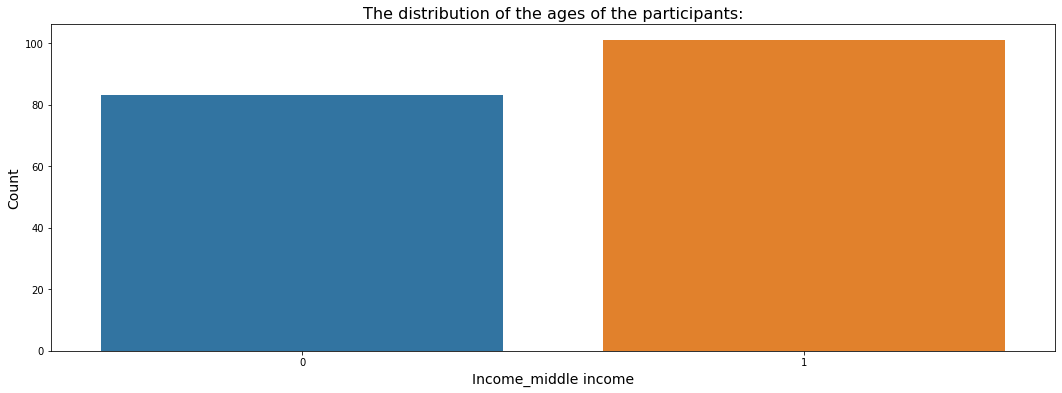

In [58]:
# the distribution of the ages of the participants:

plt.figure(figsize=(18,6))
sns.countplot(data=df_with_dummies, x='Income_middle income')
plt.title('The distribution of the ages of the participants:', fontsize= 16)
plt.xlabel('Income_middle income', fontsize= 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

Most of the countries in the dataset are middle income countries

### Region

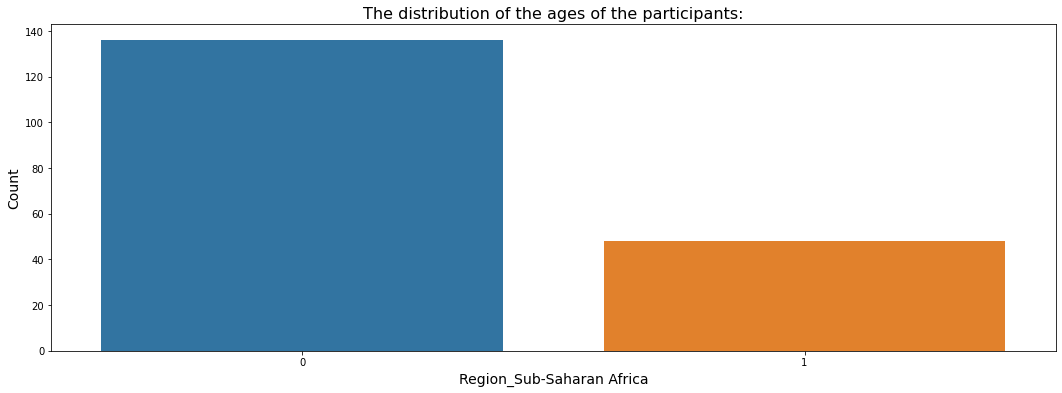

In [66]:
# the distribution of the ages of the participants:

plt.figure(figsize=(18,6))
sns.countplot(data=df_with_dummies, x='Region_Sub-Saharan Africa')
plt.title('The distribution of the ages of the participants:', fontsize= 16)
plt.xlabel('Region_Sub-Saharan Africa', fontsize= 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

Most of the countries from the dataset are not Saharan

### Development

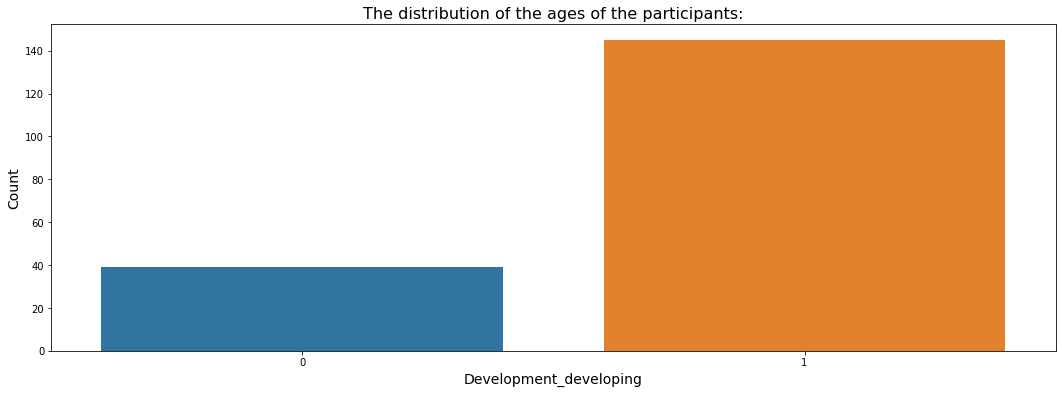

In [60]:
# the distribution of the ages of the participants:

plt.figure(figsize=(18,6))
sns.countplot(data=df_with_dummies, x='Development_developing')
plt.title('The distribution of the ages of the participants:', fontsize= 16)
plt.xlabel('Development_developing', fontsize= 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

Most of the countries in the dataset are Developing countries

### WorldRank

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


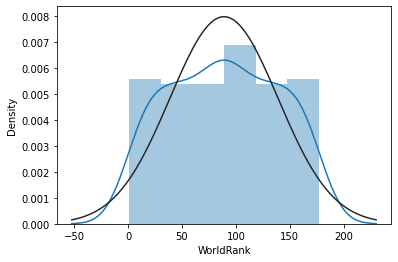

In [61]:
sns.distplot(df_with_dummies['WorldRank'], fit=norm)

The distribution of the variable WorldRank is normal

### RegionRank

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


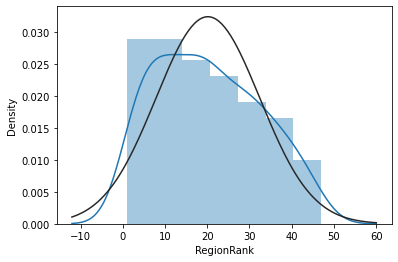

In [62]:
sns.distplot(df_with_dummies['RegionRank'], fit=norm)

The distribution of the variable RegionRank is normal

### CorporateTaxRate

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


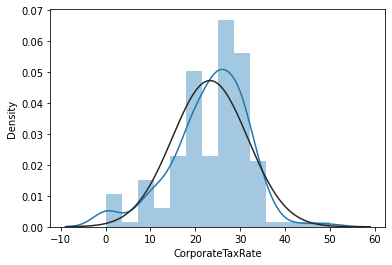

In [63]:
sns.distplot(df_with_dummies['CorporateTaxRate'], fit=norm)

The distribution of the variable CorporateTaxRate is normal

### GovernmentSpending

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


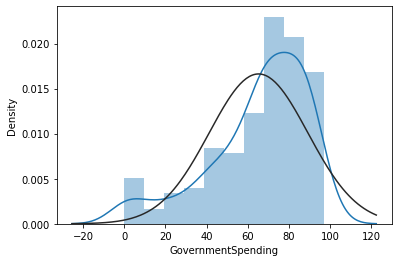

In [64]:
sns.distplot(df_with_dummies['GovernmentSpending'], fit=norm)

The distribution of the variable GovernmentSpending is normal

### Inflation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


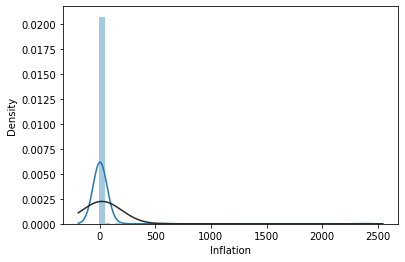

In [65]:
sns.distplot(df_with_dummies['Inflation'], fit=norm)

The distribution of the variable Inflation is normal

## Pairwise analysis

In [72]:
tmp = predictors
tmp.append("TariffRate")
df_with_dummies[tmp].corr()

,Income_middle income,Region_Sub-Saharan Africa,Development_developing,WorldRank,RegionRank,CorporateTaxRate,GovernmentSpending,Inflation,TariffRate
Income_middle income,1.000000,-0.058397,0.545373,0.374865,0.218374,0.118250,0.224842,0.082345,0.237132
Region_Sub-Saharan Africa,-0.058397,1.000000,0.308106,0.398621,0.180442,0.415752,0.372045,-0.001827,0.410266
Development_developing,0.545373,0.308106,1.000000,0.633937,0.242180,0.202285,0.500903,0.059179,0.366983
WorldRank,0.374865,0.398621,0.633937,1.000000,0.671701,0.330630,0.270183,0.179783,0.486610
RegionRank,0.218374,0.180442,0.242180,0.671701,1.000000,0.160385,-0.001238,0.121944,0.276679
CorporateTaxRate,0.118250,0.415752,0.202285,0.330630,0.160385,1.000000,0.225954,0.104335,0.255994
GovernmentSpending,0.224842,0.372045,0.500903,0.270183,-0.001238,0.225954,1.000000,0.070524,0.346049
Inflation,0.082345,-0.001827,0.059179,0.179783,0.121944,0.104335,0.070524,1.000000,0.223648
TariffRate,0.237132,0.410266,0.366983,0.486610,0.276679,0.255994,0.346049,0.223648,1.000000


The level of developing countires influence on middle class in the country

WorldRank country influence on the level of developing countries

Developing countries correlate with GovernmentSpending 

WorldRank influence on the RegionRank

Corporate taxes aren't influence a lot on the variables (predictors)

Inflation aren't influnce a lot on the variables (predictors)

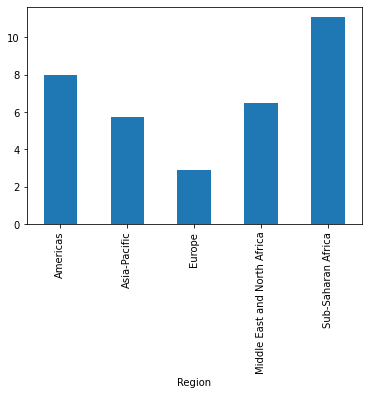

In [80]:
df.groupby('Region')['TariffRate'].median().plot(kind='bar')
#clustered bar chart based of frequencies

The biggest tariff rates in the sahara region and europe region has lowest tariff rates. That's why sahara has the biggest influence on the tariff rates from the regions

## Factor analysis

In [82]:
dependent_var = "TariffRate"
predictors = [
    "Income_middle income", # 0.237132
    "Region_Sub-Saharan Africa",
    "Development_developing", # 0.366983

    "WorldRank", # 0.486610
    "RegionRank", # 0.276679
    "CorporateTaxRate", # 0.255994
    "GovernmentSpending", # 0.346049
    "Inflation" # 0.223648
    # Should add 5 more with the highest corr
]

In [86]:
df_factors = df_with_dummies[predictors]

fa = FactorAnalyzer(n_factors=len(df_factors), rotation='varimax', method='principal') 
fa.fit(df_factors)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:376: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  FutureWarning,


FactorAnalyzer(method='principal', n_factors=184, rotation='varimax',
               rotation_kwargs={})

In [87]:
ev, v = fa.get_eigenvalues()
ev # 9 eigenvalues

array([2.93828356, 1.27160316, 1.15789762, 0.96458573, 0.71513038,
       0.43980567, 0.34721966, 0.16547422])

In [88]:
ev[ev > 1]

array([2.93828356, 1.27160316, 1.15789762])

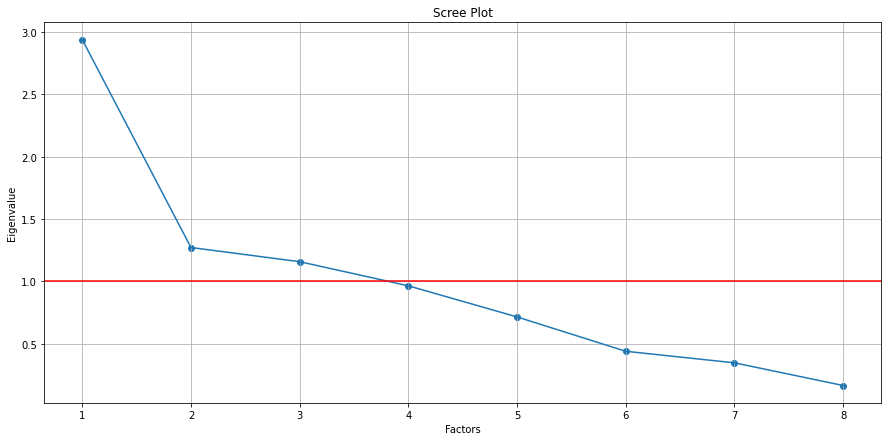

In [89]:
plt.figure(figsize=(15, 7))
plt.scatter(range(1, df_factors.shape[1]+1), ev)
plt.plot(range(1, df_factors.shape[1]+1), ev)
plt.axhline(y=1, color='r', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

We have 3 factors for analysis

In [90]:
fa = FactorAnalyzer(n_factors=3, rotation='varimax', method='principal') 
fa.fit(df_factors)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:376: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  FutureWarning,


FactorAnalyzer(method='principal', rotation='varimax', rotation_kwargs={})

In [91]:
fa.loadings_

array([[ 0.81036149, -0.20893152,  0.2222364 ],
       [ 0.06866615,  0.87049165,  0.07041388],
       [ 0.84534442,  0.26088898,  0.1695403 ],
       [ 0.47081357,  0.37129121,  0.69865863],
       [ 0.1152265 ,  0.11981696,  0.87116573],
       [ 0.04399016,  0.69938025,  0.19432144],
       [ 0.6138382 ,  0.50539685, -0.26874171],
       [ 0.0088196 ,  0.00613145,  0.41426474]])

In [94]:
loading_matrix = pd.DataFrame(data=fa.loadings_, 
                       index=df_factors.columns, 
                       columns=['Factor_1', 'Factor_2', 'Factor_3'])

In [95]:
loading_matrix

,Factor_1,Factor_2,Factor_3
Income_middle income,0.810361,-0.208932,0.222236
Region_Sub-Saharan Africa,0.068666,0.870492,0.070414
Development_developing,0.845344,0.260889,0.169540
WorldRank,0.470814,0.371291,0.698659
RegionRank,0.115227,0.119817,0.871166
CorporateTaxRate,0.043990,0.699380,0.194321
GovernmentSpending,0.613838,0.505397,-0.268742
Inflation,0.008820,0.006131,0.414265


Factor 1 Name = Middle income and developing countries<br>
Factor 2 Name = Sahara region countries and high corporate tax rate<br>
Factor 3 Name = World and Region Ranking

In [96]:
factor_names = [
    'Middle income and developing countries', 
    'Sahara region countries and high corporate tax rate', 
    'World and Region Ranking'
]

In [97]:
transformed = pd.DataFrame(data=fa.transform(df_factors),
                           index=df_factors.index,
                           columns=factor_names)
transformed

,Middle income and developing countries,Sahara region countries and high corporate tax rate,World and Region Ranking
CountryID,,,
1,-0.103694,-0.097786,-0.213224
2,0.827639,-1.044463,0.019611
3,0.816835,-0.392772,0.379672
4,0.750843,1.021721,0.401805
5,0.589583,-0.574174,1.000141
...,...,...,...
179,-0.116684,-0.350136,4.998064
180,1.108238,-0.558260,-0.466247
181,-0.112007,-0.102590,-0.179102


In [98]:
df = pd.concat([df, transformed], axis=1)

## Linear regression

In [99]:
transformed

,Middle income and developing countries,Sahara region countries and high corporate tax rate,World and Region Ranking
CountryID,,,
1,-0.103694,-0.097786,-0.213224
2,0.827639,-1.044463,0.019611
3,0.816835,-0.392772,0.379672
4,0.750843,1.021721,0.401805
5,0.589583,-0.574174,1.000141
...,...,...,...
179,-0.116684,-0.350136,4.998064
180,1.108238,-0.558260,-0.466247
181,-0.112007,-0.102590,-0.179102


#### Hypothesis:

H0: The linear regression model constructed for a dependent variable 'Tariff Rates' and the following predictors:
- Middle income and developing countries factor
- Sahara region countries and high corporate tax rate
- World and Region Ranking

explains the variation of 'Tariff Rates'.

H1: The aforementioned model does not explain the variation of 'Tariff Rates'.

p-value = 0.05.

The hypothesis can be checked based on R^2 of the model as well as based on the results of F-test

In [100]:
import statsmodels.api as sm
df_model = transformed.dropna(subset=['Middle income and developing countries', 
                                          'Sahara region countries and high corporate tax rate',
                                          'World and Region Ranking'
                                          ])
df_model.shape

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(184, 3)

In [102]:
x_mult = transformed[['Middle income and developing countries', 
                                          'Sahara region countries and high corporate tax rate',
                                          'World and Region Ranking'
                                          ]]
y = df_with_dummies['TariffRate']
x_mult_constant = sm.add_constant(x_mult)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [103]:
model = sm.OLS(y, x_mult_constant).fit()

In [104]:
print('R^2 = {:f}'.format(model.rsquared))
print('F-test significance = {:f}'.format(model.f_pvalue))

R^2 = 0.306524
F-test significance = 0.000000


The model is statistically significant and explains 30,6% of variance of variable 'TariffRate'. H1 is rejected at p-value = 0.05

## Regression equation

In [105]:
l = []
for (param, index) in zip(model.params[1:], model.params.index[1:]):
    l.append('{:.2f}*{}'.format(param, index))
    
print('Y = {:2f} + {}'.format(model.params[0], ' + '.join(l)))

Y = 7.796196 + 1.98*Middle income and developing countries + 2.39*Sahara region countries and high corporate tax rate + 1.69*World and Region Ranking


## Relationships

In [106]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             TariffRate   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     26.52
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           2.97e-14
Time:                        12:09:27   Log-Likelihood:                -568.48
No. Observations:                 184   AIC:                             1145.
Df Residuals:                     180   BIC:                             1158.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

- the coef of Middle income and developing countries is positive and equals to 1.9 => tariffrate increase 1.9 points for increasing that factor
- the coef of Sahara region and high corporate tax rate is positive adn equals to 2.4 => tariffrate increase 2.4 points for incresing that factor
- the coef of World and Region Ranking is positive and equals to 1.7 => tariffrate increase 1.7 points for increasing that factor

## Model diagnostics

### Residuals

To evaluate how he model fits the sample data, the residuals can be calculated. Small residuals show that fits the sample data well

#### Hypothesis:

H1: The distribution of residuals is different from the normal distribution

H0: The distribution of residuals is not different from the normal distribution

p-value = 0.05

In [109]:
p = kstest(model.resid, 'norm', args=(model.resid.mean(), model.resid.std())).pvalue
print('P-value: {:.3f}'.format(p))

P-value: 0.000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


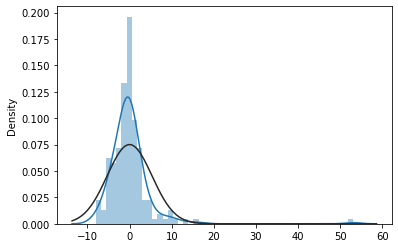

In [110]:
sns.distplot(model.resid, fit=norm) 

#### Conclusion:

H1 is accepted at p-value = 0.05: the distribution of residuals is different from the normal distribution.

Indeed, there are some outliers, which is seen on the plot. The model does not really well fit the sample data

### Multicollinearity

Multicollinearity can be checked to find any strong correlations between predictors

In [115]:
vifs = np.array([vif(model.model.exog, i) for i in range(model.model.exog.shape[1])])

vif_df = pd.DataFrame()
vif_df['VIF'] = vifs[1:]
vif_df['Features'] = model.params.index[1:]
vif_df.sort_values(by=['VIF'])

,VIF,Features
0,1.0,Middle income and developing countries
2,1.0,World and Region Ranking
1,1.0,Sahara region countries and high corporate tax...


All factors are statistical important for the analysis.

### Heteroscedasticity

To check the well-fitness of the model, the heteroscedasticity can be evaluated. If the model is well-fitted, there should be no pattern to the residuals plotted against the fitted values.

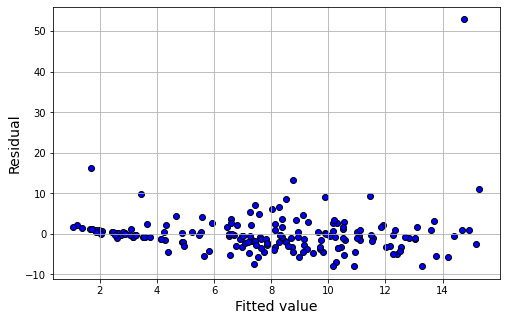

In [116]:
plt.figure(figsize=(8,5))
plt.scatter(x=model.fittedvalues, y=model.resid, color='blue', edgecolor='k')
plt.grid(True)
plt.xlabel('Fitted value', fontsize=14)
plt.ylabel('Residual', fontsize=14)
plt.show()

Generally, the model can be characterized to be both homoscedastic (for the first 100 000 fitted values) then heteroscedastic (for all the fitted values). Since we evaluate all the model and variance of the residuals is non-constant throughout the whole model (especially in comparison of the left and the right sides of the plot), we have to say that there still exists a problem of heteroscedasticity.

### Outliers and influential cases

Influential cases can be detected using DFFITS techniqe. Outliers can be detected by checking the standardized residuals of cases in the sample

In [117]:
influence = model.get_influence()
inf_sum = influence.summary_frame()
inf_sum

,dfb_const,dfb_Middle income and developing countries,dfb_Sahara region countries and high corporate tax rate,dfb_World and Region Ranking,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
CountryID,,,,,,,,,,
1,-0.006831,0.000708,0.000668,0.001456,0.000013,-0.092644,0.005792,-0.007071,-0.092388,-0.007052
2,-0.045507,-0.037664,0.047531,-0.000892,0.001442,-0.613681,0.015088,-0.075957,-0.612615,-0.075825
3,0.064881,0.052997,-0.025484,0.024634,0.002071,0.875951,0.010683,0.091024,0.875382,0.090965
4,-0.068255,-0.051249,-0.069738,-0.027425,0.003228,-0.919267,0.015050,-0.113631,-0.918869,-0.113582
5,0.040500,0.023878,-0.023254,0.040506,0.001102,0.546423,0.014552,0.066401,0.545356,0.066271
...,...,...,...,...,...,...,...,...,...,...
179,-0.041311,0.004820,0.014465,-0.206476,0.011188,-0.520137,0.141939,-0.211549,-0.519081,-0.211119
180,-0.031504,-0.034914,0.017587,0.014689,0.000687,-0.425094,0.014985,-0.052431,-0.424125,-0.052312
181,-0.007241,0.000811,0.000743,0.001297,0.000014,-0.098208,0.005734,-0.007458,-0.097938,-0.007438


#### Potential influential cases

Such cases can be found using difference in fit(s) diagnostic (DFFITS). DFFITS value shows how influential a particual case on the whole model

In [118]:
inf_sum['dffits'][(inf_sum['dffits']>1) | (inf_sum['dffits']<-1)].sort_values()

CountryID
183    3.112778
Name: dffits, dtype: float64

#### Potential outliers

Based on standardized residuals, it is possible to identify outliers (whose value has to be less than -3 or greater than 3)

In [119]:
inf_sum['standard_resid'][(inf_sum['standard_resid']>3) | (inf_sum['standard_resid']<-3)].sort_values()

CountryID
10      3.072708
183    10.056323
Name: standard_resid, dtype: float64

### Final Conclusions

The constructed linear model appeared to be statistically significant but explains only 30,6% variance of the tariff rates. Since this indicator is quite low, the model still has to be readjusted and refined. For instance, the statistically insignificant variables can be removed from the model, which will also help to avoid the problem of multicollinearity. Another way is to remove all the outliers from the sample. As it is presented above, these outliers highly influence the model since most of them are represented in the set of the most influential cases. With the outliers removed, the problem of heteroscedasticity can also potentially disappear.

From my persepective, it is also better to try removing all variables which do not have a linear relationship with the dependent variable since they still cannot be well-fitted in the linear regression model. Potentially, the logistic regression can be constructed for these variables as the relationship between each of these variables and dependent one is more close to logistic.

# Task 2

In [120]:
df_with_dummies.corr().sort_values(by=['TariffRate'])['TariffRate']

TradeFreedom                          -0.836958
BusinessFreedom                       -0.497330
2022Score                             -0.482924
PropertyRights                        -0.453347
MonetaryFreedom                       -0.448836
GDPperCapita                          -0.432999
FinancialFreedom                      -0.427789
HighIncome                            -0.398941
Income_high income                    -0.398941
Region_Europe                         -0.379159
Development_developed                 -0.366983
JudicialEffectiveness                 -0.365185
InvestmentFreedom                     -0.350062
GovernmentIntegrity                   -0.348495
GovernmentExpenditurofGDP             -0.347149
LaborFreedom                          -0.343095
TaxBurdenofGDP                        -0.271935
GDP                                   -0.141760
FDIInflow                             -0.127762
Region_Asia-Pacific                   -0.087417
5Year_GDP_GrowthRate                  -0

In [126]:
cluster_analysis = [
    "TariffRate",
    "WorldRank",
    "Region_Sub-Saharan Africa",
    "Development_developing",
    "GovernmentSpending",
    "RegionRank"
    # Should add 5 more with the corr lower than 0.5
]

def get_vars_to_analysis():
    res = []
    for i in cluster_analysis:
        res.append('z_' + i)

    return res

The statistical descriptive analysis was done in previous task (same variables)

## Suitable cluster algorithm

Ward algo should be done here. We need to find the closest cluster to choose the appropriate tariff rate.

## Define the number of cluster

In [129]:
for var in cluster_analysis:
    df_with_dummies['z_' + var] = (df_with_dummies[var] - df_with_dummies[var].mean())/df_with_dummies[var].std()

Z = linkage(df_with_dummies[get_vars_to_analysis()], method='ward', metric='euclidean') 

In [132]:
for k in range (2, 10):
    labels = fcluster(Z, t=k, criterion='maxclust')
    print('Number of clusters: {}, index {}'.format(k, calinski_harabasz_score(df[get_vars_to_analysis()], labels)))

Number of clusters: 2, index 87.03422043835876
Number of clusters: 3, index 92.59788007440497
Number of clusters: 4, index 86.46345293458563
Number of clusters: 5, index 88.56632815292465
Number of clusters: 6, index 90.04608503807457
Number of clusters: 7, index 94.68697482508075
Number of clusters: 8, index 93.2472698479907
Number of clusters: 9, index 92.78434674286324


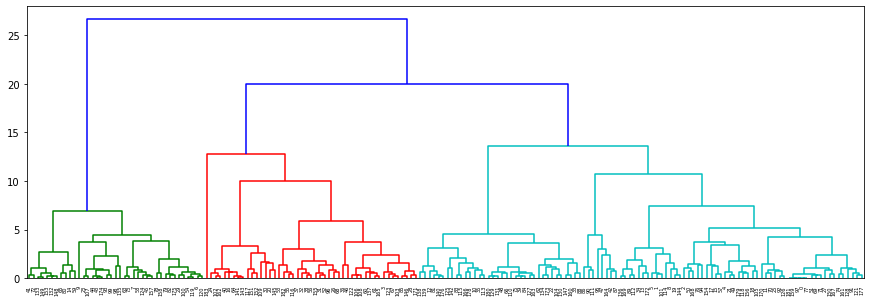

In [133]:
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df_with_dummies[get_vars_to_analysis()], 'ward'))
#Ward's Method

That number was chosen according the created dendrogram. The distance between joining (height). If two clusters are merged, the dendrogram will join them in a graph and the height of the join will be the distance between those clusters.

The number of clusters are 3.

In [134]:
labels = fcluster(Z, t=3, criterion='maxclust')
labels

array([3, 3, 3, 2, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 1, 3, 2, 3, 3, 3, 2, 3,
       3, 1, 2, 3, 2, 3, 2, 1, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 1, 3, 1,
       1, 1, 2, 3, 3, 3, 3, 3, 2, 2, 1, 2, 2, 3, 1, 1, 2, 2, 3, 1, 2, 1,
       3, 2, 2, 3, 3, 3, 1, 1, 3, 3, 3, 3, 1, 1, 1, 3, 1, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 1, 3, 3, 2, 3, 1, 1, 1, 3, 2, 2, 3, 3, 2, 1, 2, 2,
       3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 1, 3, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3,
       1, 1, 3, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3, 1, 1, 3, 2, 2, 1,
       3, 2, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 1, 1,
       3, 3, 3, 3, 3, 3, 2, 2], dtype=int32)

In [135]:
df_with_dummies['cluster_labels'] = labels
df = df_with_dummies

## Describe the model

In [136]:
df.groupby('cluster_labels')[get_vars_to_analysis()].mean()

,z_TariffRate,z_WorldRank,z_Region_Sub-Saharan Africa,z_Development_developing,z_GovernmentSpending,z_RegionRank
cluster_labels,,,,,,
1,-0.705691,-1.219031,-0.592472,-1.922952,-0.963211,-0.465700
2,0.691375,0.654598,1.678671,0.517208,0.691526,0.278587
3,-0.050742,0.171185,-0.569297,0.517208,0.051668,0.051721


In [137]:
df['cluster_labels'].value_counts()

3    98
2    47
1    39
Name: cluster_labels, dtype: int64

Cluster analysis was done according to the TariffRates => 

- 1 Cluster contains the lowest tariff rates (the low developed countries)
- 2 Cluster contains the highest tariff rates (the high developed countires)
- 3 Cluster contains the middle tariff rates (the middle developed countries) <br>

The names of the clusters was chosen according to the tariff levels.

In [138]:
df['cluster_labels'] = df['cluster_labels'].replace(1, 'Low tariff rates')
df['cluster_labels'] = df['cluster_labels'].replace(2, 'High tariff rates')
df['cluster_labels'] = df['cluster_labels'].replace(3, 'Middle tariff rates')

df.groupby('cluster_labels').head()

,CountryName,HighIncome,WorldRank,RegionRank,2022Score,PropertyRights,JudicialEffectiveness,GovernmentIntegrity,TaxBurden,GovernmentSpending,...,Region_Europe,Region_Middle East and North Africa,Region_Sub-Saharan Africa,z_TariffRate,z_WorldRank,z_Region_Sub-Saharan Africa,z_Development_developing,z_GovernmentSpending,z_RegionRank,cluster_labels
CountryID,,,,,,,,,,,,,,,,,,,,,
1,Afghanistan,0,89.0,19.0,59.8,50.4,45.8,0.000000,78.9,70.2,...,0,0,0,-0.202518,0.000000,-0.592472,0.517208,0.206396,-0.093799,Middle tariff rates
2,Albania,0,50.0,30.0,66.6,55.5,49.8,35.606077,89.1,72.1,...,1,0,0,-0.639990,-0.776118,-0.592472,0.517208,0.285350,0.797515,Middle tariff rates
3,Algeria,0,167.0,13.0,45.8,27.9,29.7,30.098833,67.2,57.1,...,0,1,0,0.938035,1.552236,-0.592472,0.517208,-0.337971,-0.579971,Middle tariff rates
4,Angola,0,139.0,29.0,52.6,39.8,25.3,20.633745,86.6,86.4,...,0,0,1,-0.046278,0.995023,1.678671,0.517208,0.879584,0.716486,High tariff rates
5,Argentina,0,144.0,27.0,50.1,35.1,57.9,45.055133,73.3,53.0,...,0,0,0,0.688051,1.094526,-0.592472,0.517208,-0.508346,0.554429,Middle tariff rates
6,Armenia,0,58.0,34.0,65.3,50.4,33.1,50.780107,86.9,78.9,...,1,0,0,-0.327510,-0.616914,-0.592472,0.517208,0.567923,1.121629,Middle tariff rates
7,Australia,1,12.0,4.0,77.7,91.7,95.2,87.029360,62.5,51.6,...,0,0,0,-0.827478,-1.532336,-0.592472,-1.922952,-0.566523,-1.309228,Low tariff rates
8,Austria,1,22.0,15.0,73.8,98.4,94.6,82.866625,45.5,20.3,...,1,0,0,-0.764982,-1.333331,-0.592472,-1.922952,-1.867188,-0.417914,Low tariff rates
10,Bahamas,1,38.0,6.0,68.7,61.1,78.8,64.292915,96.5,85.8,...,0,0,0,1.594244,-1.014924,-0.592472,-1.922952,0.854651,-1.147171,Low tariff rates


# Task 3

Методология количественного исследования: необходимо проанализировать три выборки студентов (школьники и их тенденции по будущим поступлениям, студенты и их тенденции по качеству обучения (IT) и выпускники по трудоустройству). <br>


**Школьников** необходимо проанализировать про то, каике любимые предметы в школе и куда будет поступать школьник (планирует) для того, чтобы узнать, какие предметы в школе влияют на поступления в ВУЗ на IT специальность (для того, чтобы в будущем улучшить преподавание по таким дисциплинам => увеличит число поступления в IT отрасль). <br>
**Гипотеза**: любимые предметы математика и информатика должны больше всего влиять на поступления в IT отрасль<br>
**Методы анализа** можно использовать факторный анализ для проверки гипотез на направление поступления 


**Студентов** необходимо проанализировать про то, какие предметы преподают качественней всего и какие оценки по предметам у того или иного предмета => увеличит качество обучения на IT специальность <br>
**Гипотеза**: необходимо проверить какие параметры в предмете нравятся больше всего, чтобы понять, почему студент получает те или иные оценки по предмету<br>
**Методы анализа**: построить факторный анализ => линейная регрессия, чтобы установить ключевые причины хорошей обучаемости у того или иного студента

**Выпускников** необходимо проанализировать, чтобы определить причины сохранения сотрудника в IT отрасли. Необходимо проанализировать зарплату, компания и причины работы в IT отрасли, а также взять текущее место работы и отрасль
**Гипотеза**: люди остаются в IT отрасли из-за ее перспективности, а также возможности в любой момент найти работу из-за дефицита на рынке 
**Методы анализа**: необходимо построить кластерный анализ, чтобы узнать, какие сотрудники остались на рабочем месте и по каким причинам, а какие ушли, чтобы сохранить сотрудников в IT отрасли